In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import json

In [7]:
def loop_grid(matrix, mkd, a, neighbours):
    
    # protential grid
    transH = np.ones((50,50))
    transI = np.ones((50,50))
    transC = np.ones((50,50))
    
    list_distances = [1, 1.4, 2, 2.2, 2.8, 3, 3.2, 3.6, 4, 4.1, 4.2, 4.5, 5, 5.1, 5.4, 5.7, 5.8, 6, 6.1, 6.3, 6.4, 6.7, 7.1, 7.2, 7.8, 8.5]
    
    #i,j current house grid
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
        
            # check if matrix[i,j] is river
            if matrix[i, j] == 4:
                transH[i, j] = -9999999999
                transI[i, j] = -9999999999
                transC[i, j] = -9999999999
                continue
                
                
            
        
            # k,l is neighbourhood
            for k in range(i-(neighbours), i+(neighbours+1)):
                for l in range(j-(neighbours), j+(neighbours+1)):
                    
                    #only if neighboorhoud exists
#                   check if the neigbours are inside grid
                    if k < 0 or k > 49 or l < 0 or l > 49:
                        continue
            
                    else:
                        '''zoek op in dict:
                        ik ben zelf Matrix[i,j]
                        ik kijk naar Matrix[k,l]
                        ik kan worden loop [H, I, C] en update probabilitygrid
                        Eet een koekje
                        '''  
                                        
#                       als degene waar je naar kijkt een huis is
                        if matrix[k, l] != 0 and (k, l) != (i, j) and matrix[i, j] != 3:
        
#                           op basis van hoe ver het huis van je vandaan zit krijg je een score uit de mkd
                            # Trans House potential
    
                            distance = round(np.sqrt((abs(i - k))**2 + (abs(l - j))**2), 1)
                            index_distance = list_distances.index(distance)
    
    
                            # kans op house worden, met wat we zelf zijn (matrix[i, j]) bepaald door plek waar we kijken en distance
#                             print(mkd[int(matrix[i, j])][1][int(matrix[k, l])][distance])
                            if matrix[i, j] != 2 and matrix[i, j] != 3:
                                transH[i, j] += mkd[int(matrix[i, j])][1][int(matrix[k, l])-1][index_distance]
            
                            # Trans Industry potential
                            if matrix[i, j] != 3:
                                transI[i, j] += mkd[int(matrix[i, j])][2][int(matrix[k, l])-1][index_distance]
                    
                            # Trans Commerce potential
                            transC[i, j] += mkd[int(matrix[i, j])][3][int(matrix[k, l])-1][index_distance]
                            
    for i in range(len(transH)):
        for j in range(len(transH[0])):
            S = 1 + (-np.log(random.random()))**(a)
            transH[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transI[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transC[i, j] *= S
            

    return transH, transI, transC

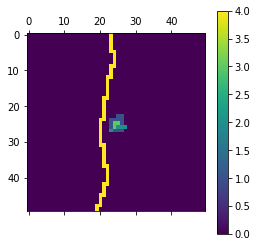

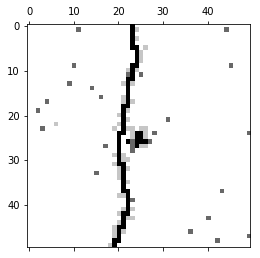

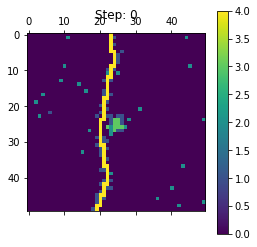

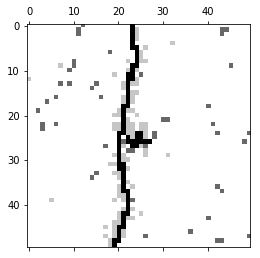

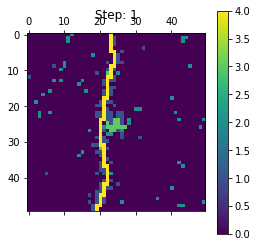

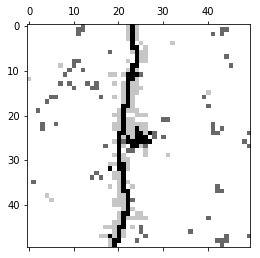

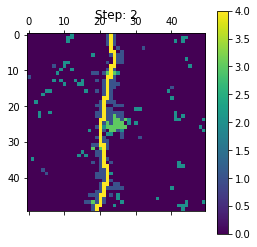

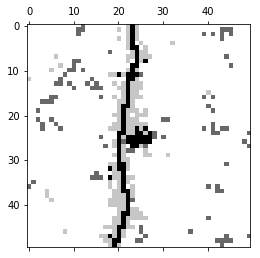

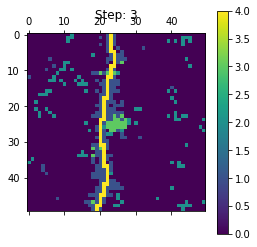

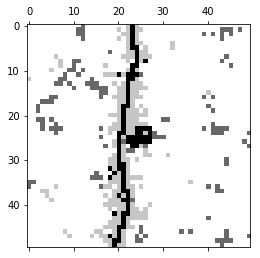

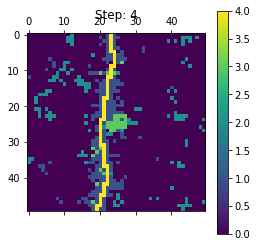

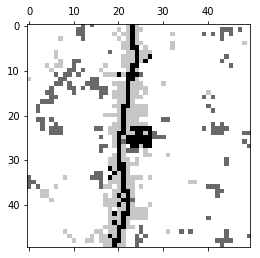

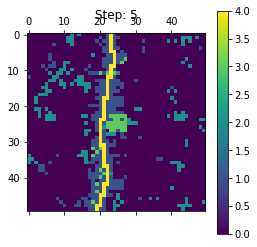

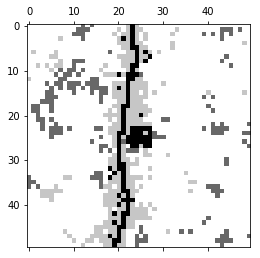

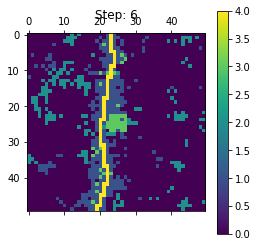

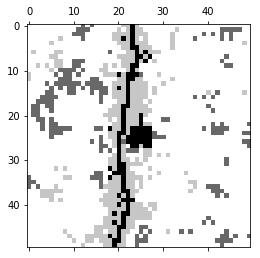

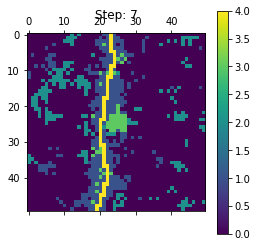

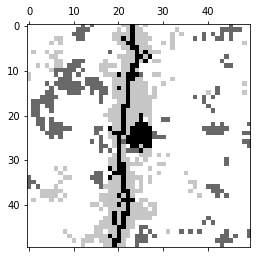

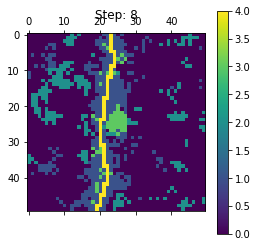

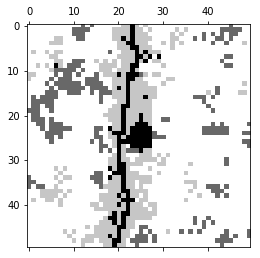

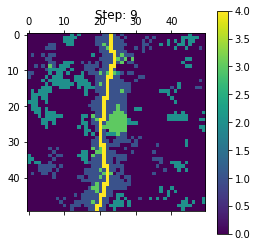

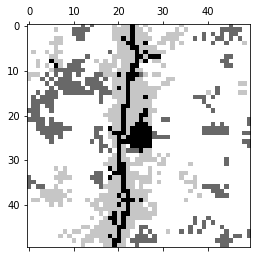

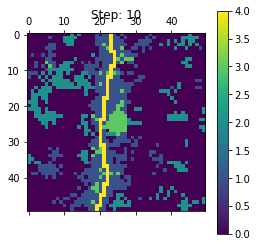

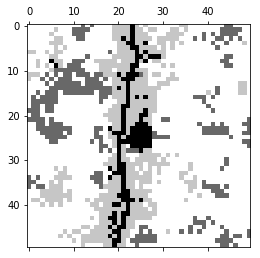

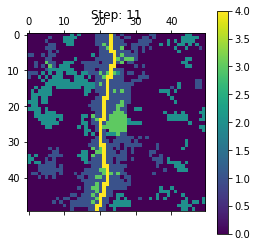

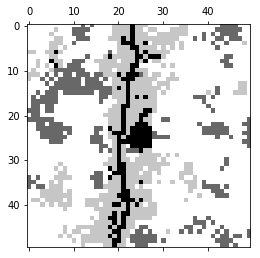

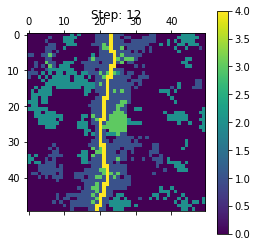

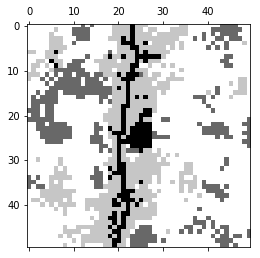

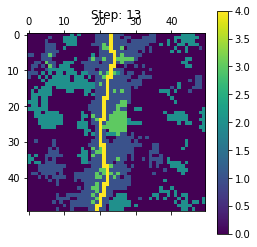

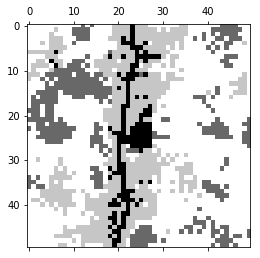

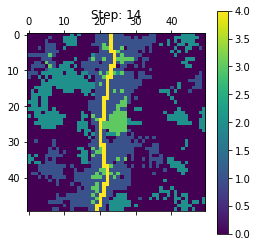

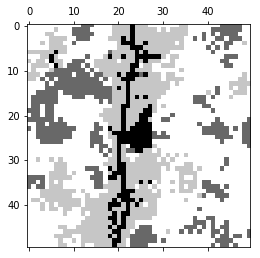

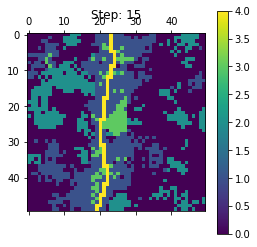

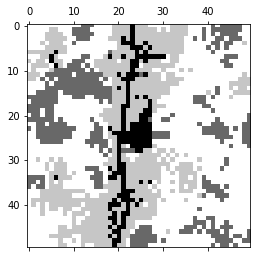

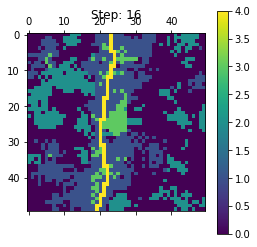

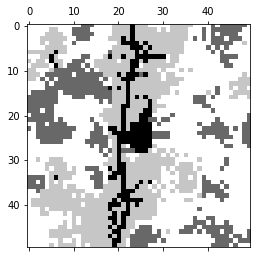

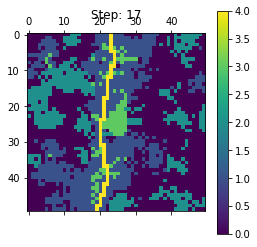

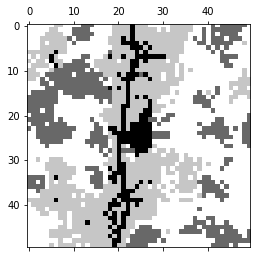

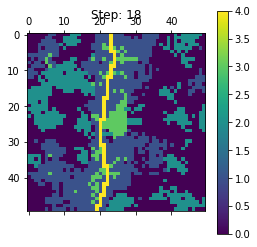

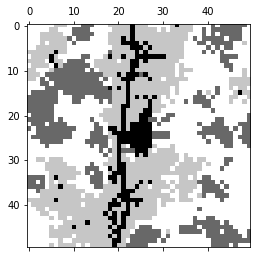

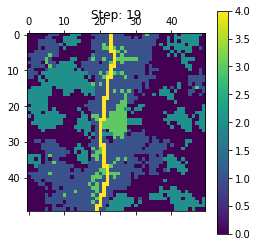

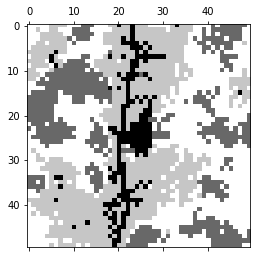

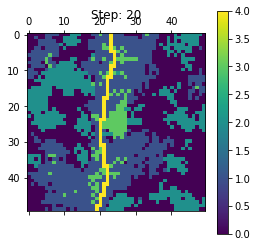

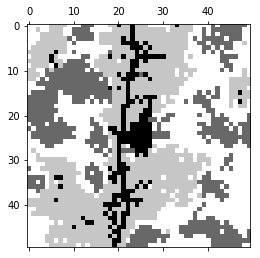

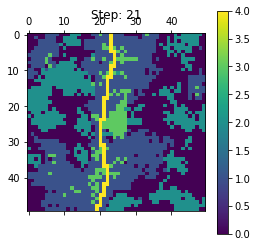

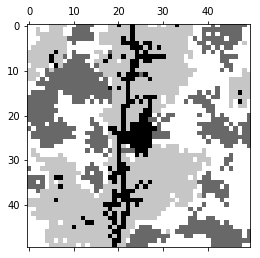

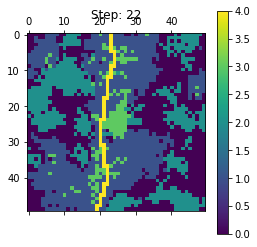

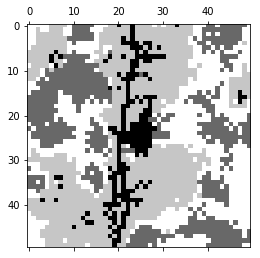

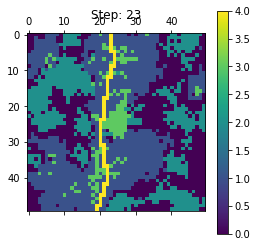

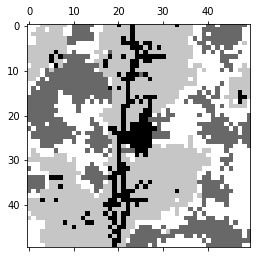

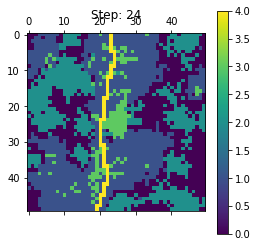

In [33]:
# V, H, I, C, R
# 0, 1, 2, 3, 4

width = 50
height = 50

neighbours = 2

city = np.zeros((width, height))

steps = 25

initial_river = [(0,23), (1,23), (2,23), (3,23), (4,23), (5,23), (5,24), (6,24), (7,24), (8,24), (9,24), (9,23), (10,23), #
                (11,23), (12, 23), (12, 22), (13,22), (14,22), (15,22), (16,22), (17,22), (18,22), (18,21), (19,21), (20,21),
               (21,21), (22,21), (23,21), (24,21), (24,20), (25,20), (26,20), (27,20), (28,20), (29,20), (30,20), (31,20),
               (31,21), (32,21), (33,21), (34,21), (35,21), (36,21), (37,21), (37,22), (38,22), (39,22), (40,22), (41,22),
               (42,22), (42,21), (43,21), (44,21), (45,21), (45,20), (46,20), (47,20), (48,20), (48,19), (49,19)]
# initial_river = [(0,23), (1,23), (2,23), (3,23), (4,23), (5,23), (5,24), (6,24), (7,24), (8,24), (9,24), (9,23), (10,23),
#                  (0,22), (1,22), (2,22), (3,22), (4,22), (5,22), (5,23), (6,23), (7,23), (8,23), (9,23), (9,22), (10,22),
#                  (11,23), (12, 23), (12, 22), (13,22), (14,22), (15,22), (16,22), (17,22), (18,22), (18,21), (19,21), (20,21),
#                  (11,22), (12, 22), (12, 21), (13,21), (14,21), (15,21), (16,21), (17,21), (18,21), (18,20), (19,20), (20,20),
#                  (21,21), (22,21), (23,21), (24,21), (24,20), (25,20), (26,20), (27,20), (28,20), (29,20), (30,20), (31,20),
#                  (21,20), (22,20), (23,20), (24,20), (24,19), (25,19), (26,19), (27,19), (28,19), (29,19), (30,19), (31,19),
#                  (31,21), (32,21), (33,21), (34,21), (35,21), (36,21), (37,21), (37,22), (38,22), (39,22), (40,22), (41,22),
#                  (31,20), (32,20), (33,20), (34,20), (35,20), (36,20), (37,20), (37,21), (38,21), (39,21), (40,21), (41,21),
#                  (42,22), (42,21), (43,21), (44,21), (45,21), (45,20), (46,20), (47,20), (48,20), (48,19), (49,19),
#                  (42,21), (42,20), (43,20), (44,20), (45,20), (45,19), (46,19), (47,19), (48,19), (48,18), (49,18)]
initial_commerce = [(25,25), (25,24), (26,24)]
initial_industry = [(26,25), (26,26), (26,27), (27,23)]
initial_houses = [(23,25), (23,26), (24,23), (24,24), (24,25), (24,26), (25,23), (25,26), (26,23), (27,24), (27,25), (27,26)]

for riv in initial_river:
    city[riv] = 4

for com in initial_commerce:
    city[com] = 3
    
for ind in initial_industry:
    city[ind] = 2
    
for h in initial_houses:
    city[h] = 1

# city[(25, 25)] = 1
#plt.matshow(city, cmap = 'Greys')
plt.matshow(city)
plt.colorbar()
plt.show()

Nh = 0.03
a = 2.0

mkd = {0: {1: [[2,2,1.5,1.5,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0], 
                [-10,-10,-5,-3,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [-2,-1,2,1,1,1,0.5,0.5,0.4,0.3,0.2,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
                [5,5,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [3,3,2,1,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [25,25,25,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]},
        1: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
                [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]},
        2: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            2: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
            3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
                [-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0],
                [10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]}}

citiesovertime = []

for step in range(steps):
    transH, transI, transC = loop_grid(city, mkd, a, neighbours)

    orderedhouses = transH.flatten().argsort()[::-1]
    orderedindustry = transI.flatten().argsort()[::-1]
    orderedcommerce = transC.flatten().argsort()[::-1]

    newhouses = orderedhouses[0:round((((width*height)*Nh)/12)*7)]
    for house in range(round((((width*height)*Nh)/12)*7)):
        orderedhouses = np.delete(orderedhouses, house)
        
    newindustry = orderedindustry[0:round((((width*height)*Nh)/12)*4)]
    for ind in range(round((((width*height)*Nh)/12)*4)):
        orderedindustry = np.delete(orderedindustry, ind)
        
    newcommerce = orderedcommerce[0:round(((width*height)*Nh)/12)]
    for com in range(round(((width*height)*Nh)/12)):
        orderedcommerce = np.delete(orderedcommerce, com)
    
    while len(set(newcommerce) & set(newindustry)) != 0:
        for doubleindex in (set(newcommerce) & set(newindustry)):
            if transI[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                newcommerce = np.append(newcommerce, orderedcommerce[0])
                orderedcommerce = np.delete(orderedcommerce, 0)
            else:
                newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                newindustry = np.append(newindustry, orderedindustry[0])
                orderedindustry = np.delete(orderedindustry, 0)
            
    while len(set(newcommerce) & set(newhouses)) != 0:
        for doubleindex in (set(newcommerce) & set(newhouses)):
            if transH[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                newcommerce = np.append(newcommerce, orderedcommerce[0])
                orderedcommerce = np.delete(orderedcommerce, 0)
            else:
                newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                newhouses = np.append(newhouses, orderedhouses[0])
                orderedhouses = np.delete(orderedhouses, 0)
            
    while len(set(newhouses) & set(newindustry)) != 0:
        for doubleindex in (set(newhouses) & set(newindustry)):
            if transI[doubleindex//width, doubleindex%height] > transH[doubleindex//width, doubleindex%height]:
                newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                newhouses = np.append(newhouses, orderedhouses[0])
                orderedhouses = np.delete(orderedhouses, 0)
            else:
                newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                newindustry = np.append(newindustry, orderedindustry[0])
                orderedindustry = np.delete(orderedindustry, 0)
        
    
    for com in newcommerce:
        city[com//width, com%height] = 3
        
    for indus in newindustry:
        if city[indus//width, indus%height] != 3:
            city[indus//width, indus%height] = 2
    
    for house in newhouses:
        if city[house//width, house%height] != 2 and city[house//width, house%height] != 3:
            city[house//width, house%height] = 1
            
    citiesovertime.append(copy.deepcopy(city))
    
    plt.matshow(city, vmin = 0, vmax = 3, cmap = 'Greys')
    plt.matshow(city, vmin = 0, vmax = 4)
    plt.title("Step: %i" %step)
    plt.colorbar()
    plt.show()
    
array = citiesovertime
diclist = {}

for h in range(len(array)):
    diclist[h] = {"time": h, "values": []}
    
    for i in range(len(array[0])):
        for j in range(len(array[0][0])):
            diclist[h]["values"].append({"x": j, "y": i, "value":array[h][i][j]})

with open('rivergrid.json', 'w') as outfile:
    json.dump(diclist, outfile)
        

        
        
        
        
        


26
26
